In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats
%matplotlib inline

# 1.4 時系列データの前処理（p.8〜）

## （a）変数変換
- 目的
    - 線形、定常、正規性などを仮定したモデリングを容易にするため
    - 最適化を容易にするため

---
### 1.対数変換

- 金額や人数などのデータは、値の増加に伴って、変動の大きさも増大する特徴を持っている。
- このような場合に、対数変換を用いると分散がほとんど一様になったり、誤差分布がほぼ正規分布とみなせる場合がある。
\begin{align}
y = h(x) = \log x 
\end{align}

In [2]:
# 卸売高
df_whard = pd.read_csv('../data/whard.csv',encoding="shift-jis")

In [3]:
# データの確認
df_whard.head()

whard
0    626
1    614
2    689
3    686
4    723

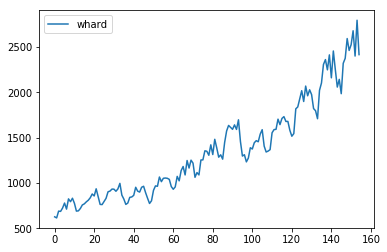

In [4]:
# 元データの可視化
df_whard.plot();

In [5]:
# 対数変換（自然対数）した変数作成
df_whard['log_whard']=df_whard['whard'].apply(lambda x: math.log(x))

In [6]:
df_whard.head()

whard  log_whard
0    626   6.439350
1    614   6.419995
2    689   6.535241
3    686   6.530878
4    723   6.583409

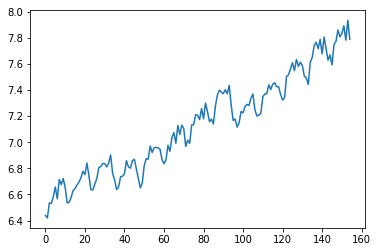

In [7]:
# 対数変換した変数を可視化
df_whard['log_whard'].plot();

- 分散一様化
- トレンドは消えない
- 変数の無制約化
    - (0, ∞)　→ (-∞, ∞)

---
### 2.Box-Cox変換
- 負の値は変換できない
- データを正規分布に近づける変換

\begin{align}
y_{\lambda}  = \frac {x^{\lambda}-1}{\lambda}  (\lambda \neq 0)\\
y_{\lambda}  = \log x  (\lambda = 0)
\end{align}

Box-Cox変換の例

In [8]:
import matplotlib.pyplot as plt

In [9]:
# log Gamma関数からデータ作成
x = stats.loggamma.rvs(5, size=500) + 5

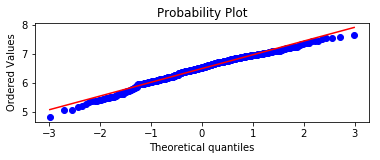

In [10]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(211)

# QQプロットで正規分布か確認（直線上に並んでいれば正規分布である）
stats.probplot(x, dist=stats.norm, plot=ax1); # stats.normは1次元Gauss分布

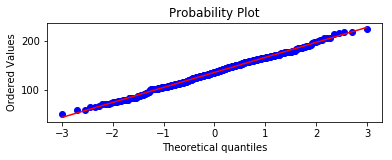

In [11]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(212)
xt, _ = stats.boxcox(x)

# QQプロットで正規分布か確認（直線上に並んでいれば正規分布である）
stats.probplot(xt, dist=stats.norm, plot=ax2);

- Box-Cox変換後は正規分布に近づいていることがわかる

---
### 3.ロジット変換
- 変換する変数は割合や確率などの(0,1)の範囲の値
- 変数の無制約化
    - (0,1) → (-∞, ∞)

\begin{align}
y  = \log \left( \frac {x}{1-x} \right )
\end{align}

In [12]:
# logit関数を定義
def logit(x):
    return np.log(x/(1-x))

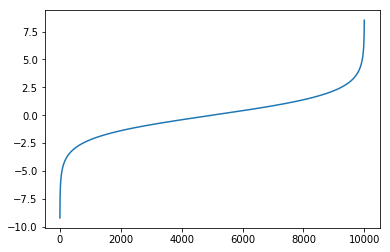

In [13]:
# logit関数自体を可視化
x = np.arange(0.0001, 0.9999, 0.0001)
plt.plot(logit(x));

ロジット変換の例

In [14]:
# 0以上1未満の乱数を100個生成
p = np.random.rand(100)

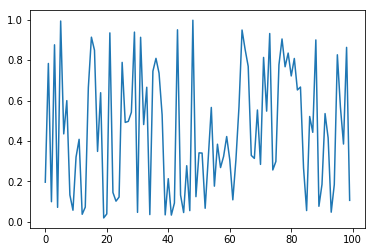

In [15]:
# 作成したデータをプロット
plt.plot(p);

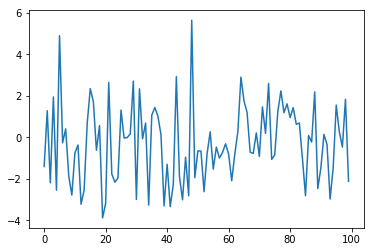

In [16]:
# logit変換後のプロット
plt.plot(logit(p));

- グラフの形は変わらない
- 値域が(0, 1)→(-∞, ∞)

---
## （b）階差（差分）

- 1階階差
\begin{align} 
z_{n} = \Delta y_{n}  =  y_{n} - y_{n-1}
\end{align}


- 2階階差
\begin{align} 
\Delta z_{n} =  z_{n} - z_{n-1} \\
= \Delta y_{n} - \Delta y_{n-1} \\
\end{align}

（対数）差分の例

In [17]:
# 日経225平均株価
df_nikkei225 = pd.read_csv('../data/nikkei225.csv',encoding="shift-jis")

In [18]:
df_nikkei225.head()

nikkei225
0      21217
1      21575
2      22791
3      22792
4      22873

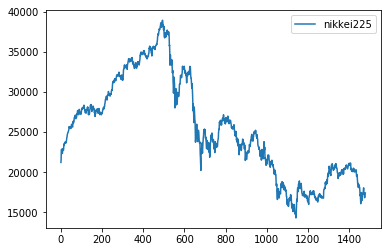

In [19]:
df_nikkei225.plot();

In [20]:
# 対数変換
df_nikkei225['log_nikkei225']=np.log(df_nikkei225['nikkei225'])

In [21]:
df_nikkei225.head()

nikkei225  log_nikkei225
0      21217       9.962558
1      21575       9.979291
2      22791      10.034121
3      22792      10.034165
4      22873      10.037712

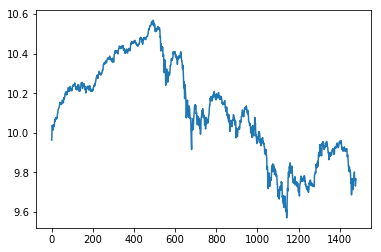

In [22]:
# 対数変換後のプロット
df_nikkei225['log_nikkei225'].plot();

In [23]:
# 対数変換した値をシフト
df_nikkei225['log_nikkei225_shift1'] = df_nikkei225['log_nikkei225'].shift(1)

In [24]:
# 対数差分を算出
df_nikkei225['diff_log_nikkei225'] = df_nikkei225['log_nikkei225'] - df_nikkei225['log_nikkei225_shift1']

In [25]:
df_nikkei225.head()

nikkei225  log_nikkei225  log_nikkei225_shift1  diff_log_nikkei225
0      21217       9.962558                   NaN                 NaN
1      21575       9.979291              9.962558            0.016732
2      22791      10.034121              9.979291            0.054830
3      22792      10.034165             10.034121            0.000044
4      22873      10.037712             10.034165            0.003548

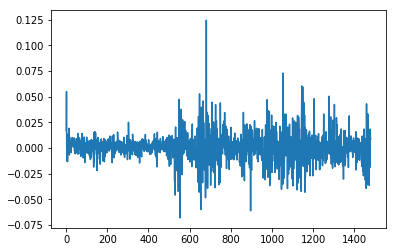

In [26]:
# 対数差分を可視化
df_nikkei225['diff_log_nikkei225'].plot();

- n=500付近を境に分散が大きく変化している

### 差分の問題点
- ノイズの構造がかえって複雑になる

---
## （c）前期比・前年同期比

### 1.前期比
\begin{align} 
z_{n} = \frac {y_{n}}{y_{n-1}}
\end{align}

In [27]:
# 1.対数変換で用いた卸売高のデータ
df_whard.head()

whard  log_whard
0    626   6.439350
1    614   6.419995
2    689   6.535241
3    686   6.530878
4    723   6.583409

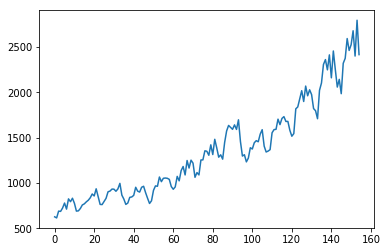

In [28]:
# 確認のため元データを再度可視化
df_whard['whard'].plot();

In [29]:
# 前期比を算出
df_whard['compared_with_the_previous_quarter']=df_whard['whard']/df_whard['whard'].shift(1)

In [30]:
df_whard.head()

whard  log_whard  compared_with_the_previous_quarter
0    626   6.439350                                 NaN
1    614   6.419995                            0.980831
2    689   6.535241                            1.122150
3    686   6.530878                            0.995646
4    723   6.583409                            1.053936

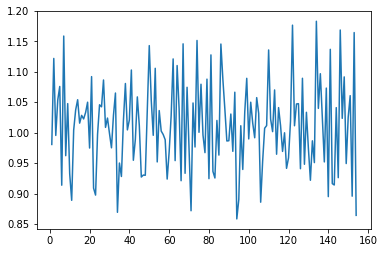

In [31]:
# 前期比の可視化
df_whard['compared_with_the_previous_quarter'].plot();

- 前期比によってトレンドが除去される

---
### 2.前年同期比

\begin{align} 
x_{n} = \frac {y_{n}}{y_{n-p}}
\end{align}

In [32]:
# (a)対数変換,(c)1.前期比で用いた卸売高のデータ
df_whard.head()

whard  log_whard  compared_with_the_previous_quarter
0    626   6.439350                                 NaN
1    614   6.419995                            0.980831
2    689   6.535241                            1.122150
3    686   6.530878                            0.995646
4    723   6.583409                            1.053936

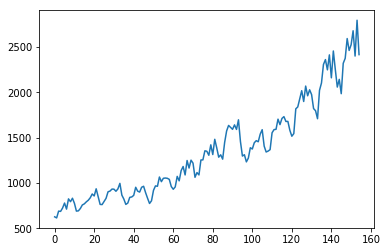

In [33]:
# 確認のため元データを再度可視化
df_whard['whard'].plot();

In [34]:
# 前年同期比を算出
df_whard['year_to_year_comparison']=df_whard['whard']/df_whard['whard'].shift(12)

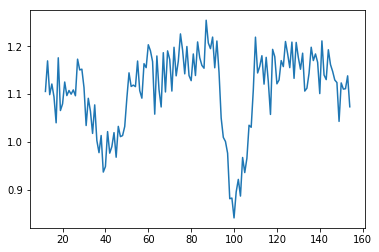

In [35]:
df_whard['year_to_year_comparison'].plot();

- 前年同期比により年周期成分が除去される
- n=40, 100付近での落ち込みが激しい

---
## （d）移動平均

- 変動の激しい時系列を滑らかにする
\begin{align} 
T_{n} = \frac {1}{2k+1} \sum^{k}_{j=-k}y_{n+j}
\end{align}

In [36]:
# 東京の日最高気温
df_maxtemp = pd.read_csv('../data/maxtemp.csv',encoding="shift-jis")

In [37]:
df_maxtemp.head()

maxtemp
0     10.4
1     11.5
2      9.7
3     13.5
4     13.6

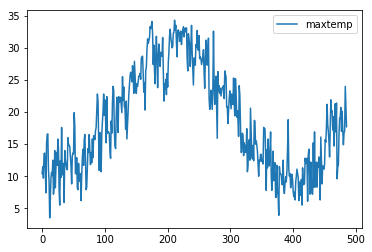

In [38]:
# 元データの可視化
df_maxtemp.plot();

In [39]:
# 単純移動平均（SMA）
# rolling(window=n).mean()で求める
# n=17
df_maxtemp['maxtemp_sma17'] = df_maxtemp['maxtemp'].rolling(window=17).mean()

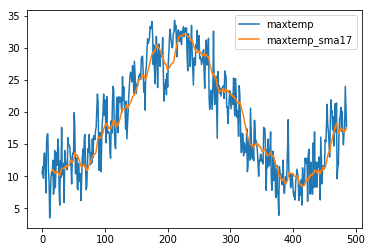

In [40]:
df_maxtemp.plot();

In [41]:
# 単純移動平均（SMA）
# rolling(window=n).mean()で求める
# n=5, 29を追加
df_maxtemp['maxtemp_sma5'] = df_maxtemp['maxtemp'].rolling(window=5).mean()
df_maxtemp['maxtemp_sma29'] = df_maxtemp['maxtemp'].rolling(window=29).mean()

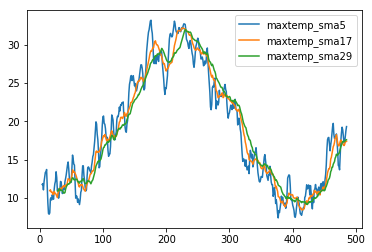

In [42]:
# 各移動平均を比較
df_maxtemp[['maxtemp_sma5','maxtemp_sma17','maxtemp_sma29']].plot();

- 項数nを増やすと滑らかになっていく

### 移動平均の性質
- 長所
    - 滑らかな推定値
- 短所
    - 構造変化を正確に検出できない
    - 異常値に敏感

---
### 【参考】移動median

- 移動平均の定義において、平均をメディアンに置き換える
\begin{align} 
T_{n} = median\{T_{n-k},\cdots,T_{n},\cdots,T_{n+k}\}
\end{align}

In [43]:
# 移動median
# rolling(window=n).median()で求める
# n=17
df_maxtemp['maxtemp_median17'] = df_maxtemp['maxtemp'].rolling(window=17).median()

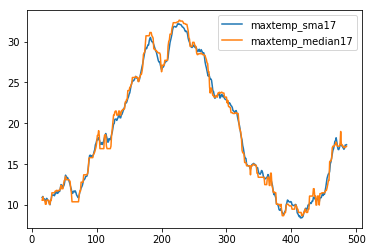

In [44]:
# n=17のときの移動平均と移動medianの比較
df_maxtemp[['maxtemp_sma17','maxtemp_median17']].plot(); 

In [45]:
# 移動median
# rolling(window=n).median()で求める
# n=5, 29を追加
df_maxtemp['maxtemp_median5'] = df_maxtemp['maxtemp'].rolling(window=5).median()
df_maxtemp['maxtemp_median29'] = df_maxtemp['maxtemp'].rolling(window=29).median()

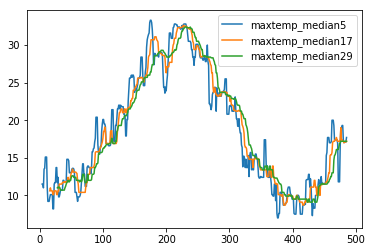

In [46]:
# 移動medianをn=5,17,29で比較
df_maxtemp[['maxtemp_median5','maxtemp_median17','maxtemp_median29']].plot(); 

### 移動medianの性質

- 長所
    - 急激な構造変化を検出できる
- 短所
    - 異常値に頑健
- 基本的に移動平均と反対の性質をもつ